In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l
import matplotlib as plt

In [2]:
#生成数据集
def synthectic_data(w,b,num_examples):
    """生成 y = Xw + b + 噪声"""
    X=torch.normal(0,1,(num_examples,len(w)))
    y=torch.matmul(X,w)+b
    y+=torch.normal(0,0.01,y.shape)
    return X,y.reshape((-1,1))

true_w=torch.tensor([2,-3.4])
true_b=4.2
feartures,labels=synthectic_data(true_w,true_b,1000)


In [4]:
feartures.shape

torch.Size([1000, 2])

In [14]:
feartures[:,1].shape

torch.Size([1000])

In [4]:
print('feartures:',feartures[0],'\nlabel:',labels[0])


feartures: tensor([ 0.7392, -0.2099]) 
label: tensor([6.3821])


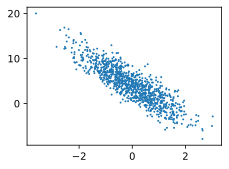

In [16]:
d2l.set_figsize()
d2l.plt.scatter(feartures[:,1].detach().numpy(),labels.detach().numpy(),1)


In [6]:
#读取小批量
def data_iter(batch_size,feartures,labels):
    num_examples=len(feartures)#样本数
    indices=list(range(num_examples))#生成一个0到num_examples-1的列表
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices=torch.tensor(indices[i:min(i+batch_size,num_examples)])#最后一次可能不足一个batch
        yield feartures[batch_indices],labels[batch_indices]
batch_size=10

for X,y in data_iter(batch_size,feartures,labels):
    print(X,'\n',y)
    break

tensor([[-0.4214, -0.2991],
        [ 0.9155,  0.5584],
        [ 0.4920,  1.1921],
        [ 1.5033,  0.6208],
        [-0.0680,  0.0342],
        [ 0.2719,  0.4960],
        [-0.1175, -2.4743],
        [-0.6336, -1.5260],
        [ 0.0294, -0.0691],
        [ 0.5134,  0.4924]]) 
 tensor([[ 4.3742],
        [ 4.1312],
        [ 1.1399],
        [ 5.0864],
        [ 3.9453],
        [ 3.0617],
        [12.3836],
        [ 8.1041],
        [ 4.4907],
        [ 3.5356]])


In [7]:
#初始化模型参数
w=torch.normal(0,0.01,size=(2,1),requires_grad=True)#requires_grad=True表示需要求梯度
b=torch.zeros(1,requires_grad=True)#requires_grad=True表示需要求梯度

In [8]:
#定义模型
def linreg(X,w,b):
    return torch.matmul(X,w)+b


In [9]:
#定义损失函数
def squared_loss(y_hat,y):
    return (y_hat-y.reshape(y_hat.shape))**2/2

In [10]:
#定义优化算法
def sgd(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            param-=lr*param.grad/batch_size
            param.grad.zero_()


In [11]:
#训练模型
lr=0.03
num_epochs=3
net=linreg
loss=squared_loss

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,feartures,labels):
        l=loss(net(X,w,b),y)#l是有关小批量X和y的损失
        #因为l形状是(batch_size,1),而不是一个标量，运行l.sum()将l中的元素加和得到一个标量，再运行l.sum().backward()得到梯度
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l=loss(net(feartures,w,b),labels)
        print(f'epoch {epoch+1},loss {float(train_l.mean()):f}')



epoch 1,loss 0.025608
epoch 2,loss 0.000082
epoch 3,loss 0.000044


In [12]:
#比较学到的参数和真实参数
print(f'w的估计误差：{true_w-w.reshape(true_w.shape)}')
print(f'b的估计误差：{true_b-b}')


w的估计误差：tensor([-0.0002, -0.0003], grad_fn=<SubBackward0>)
b的估计误差：tensor([0.0006], grad_fn=<RsubBackward1>)
